## **[Scikit-learn Visualization Guide: Making Models Speak](https://towardsdatascience.com/scikit-learn-visualization-guide-making-models-speak-6ee32a3c5c04)**

In [1]:
# @title
from sklearn.utils.discovery import all_displays

displays = all_displays()
displays

[('CalibrationDisplay', sklearn.calibration.CalibrationDisplay),
 ('ConfusionMatrixDisplay',
  sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay),
 ('DecisionBoundaryDisplay',
  sklearn.inspection._plot.decision_boundary.DecisionBoundaryDisplay),
 ('DetCurveDisplay', sklearn.metrics._plot.det_curve.DetCurveDisplay),
 ('LearningCurveDisplay', sklearn.model_selection._plot.LearningCurveDisplay),
 ('PartialDependenceDisplay',
  sklearn.inspection._plot.partial_dependence.PartialDependenceDisplay),
 ('PrecisionRecallDisplay',
  sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay),
 ('PredictionErrorDisplay',
  sklearn.metrics._plot.regression.PredictionErrorDisplay),
 ('RocCurveDisplay', sklearn.metrics._plot.roc_curve.RocCurveDisplay)]

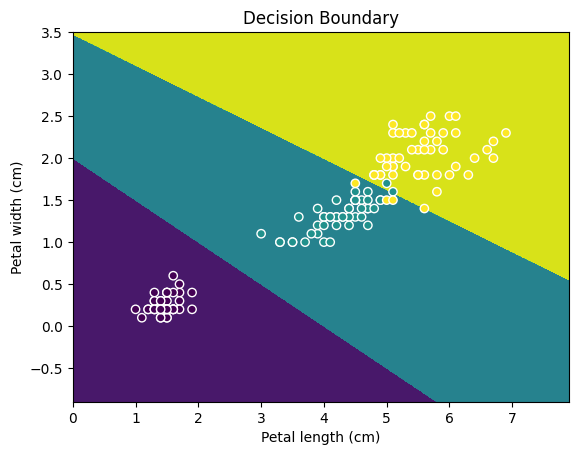

In [2]:
# @title
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target


svc_clf = make_pipeline(StandardScaler(),
                        SVC(kernel='linear', C=1))
svc_clf.fit(X, y)

display = DecisionBoundaryDisplay.from_estimator(svc_clf, X,
                                                 grid_resolution=1000,
                                                 xlabel="Petal length (cm)",
                                                 ylabel="Petal width (cm)")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='w')
plt.title("Decision Boundary")
plt.show()

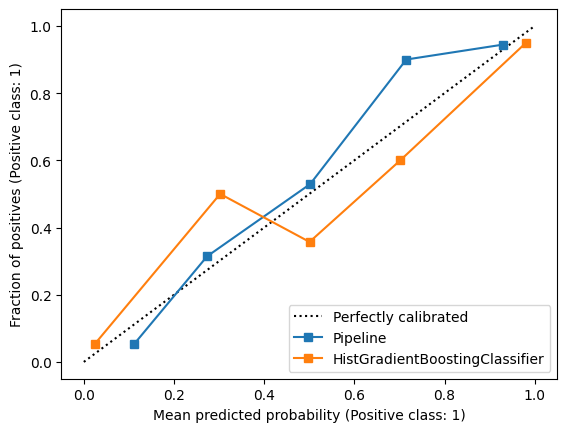

In [3]:
# @title
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import HistGradientBoostingClassifier

X, y = make_classification(n_samples=1000,
                           n_classes=2, n_features=5,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size=0.3, random_state=42)
proba_clf = make_pipeline(StandardScaler(),
                          SVC(kernel="rbf", gamma="auto",
                              C=10, probability=True))
proba_clf.fit(X_train, y_train)

CalibrationDisplay.from_estimator(proba_clf,
                                            X_test, y_test)

hist_clf = HistGradientBoostingClassifier()
hist_clf.fit(X_train, y_train)

ax = plt.gca()
CalibrationDisplay.from_estimator(hist_clf,
                                  X_test, y_test,
                                  ax=ax)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


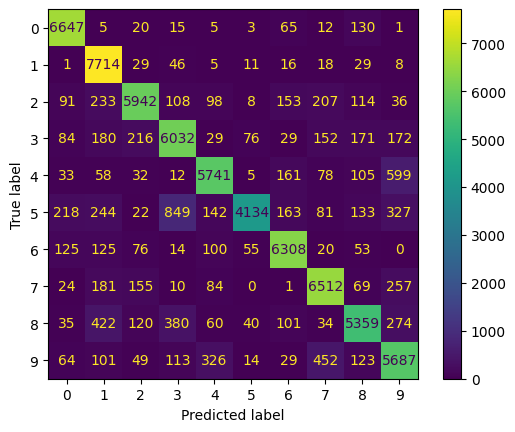

In [4]:
# @title
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

digits = fetch_openml('mnist_784', version=1)
X, y = digits.data, digits.target
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
rf_clf.fit(X, y)

ConfusionMatrixDisplay.from_estimator(rf_clf, X, y)
plt.show()

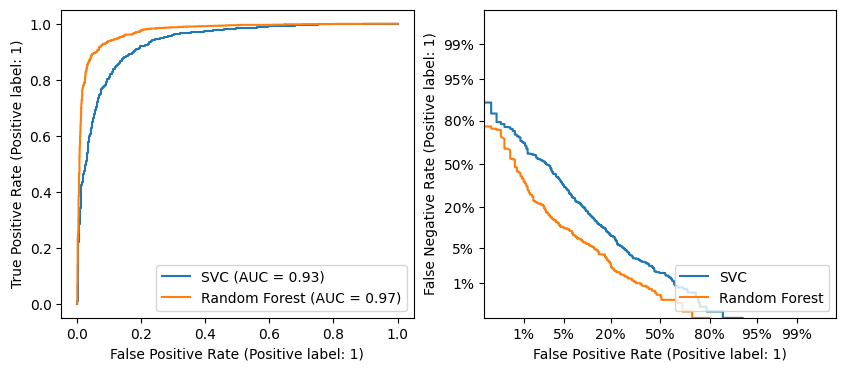

In [5]:
# @title
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import DetCurveDisplay

X, y = make_classification(n_samples=10_000, n_features=5,
                           n_classes=2, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                             test_size=0.3, random_state=42,
                                                   stratify=y)


classifiers = {
    "SVC": make_pipeline(StandardScaler(),
                        SVC(kernel="linear", C=0.1, random_state=42)),
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42)
}

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 4))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

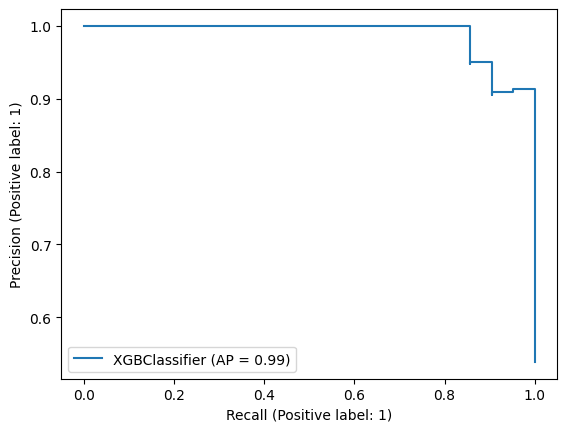

In [6]:
# @title
from xgboost import XGBClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import PrecisionRecallDisplay

wine = load_wine()
X, y = wine.data[wine.target<=1], wine.target[wine.target<=1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                               stratify=y, random_state=42)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

PrecisionRecallDisplay.from_estimator(xgb_clf, X_test, y_test)
plt.show()

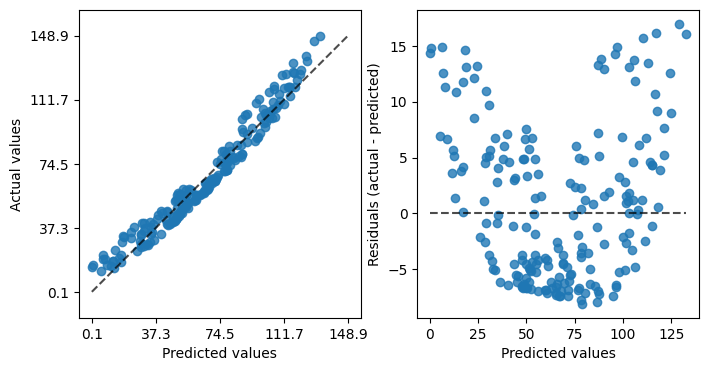

In [8]:
# @title
from sklearn.svm import SVR
from sklearn.metrics import PredictionErrorDisplay
import numpy as np

rng = np.random.default_rng(42)
X = rng.random(size=(200, 2)) * 10
y = X[:, 0]**2 + 5 * X[:, 1] + 10 + rng.normal(loc=0.0, scale=0.1, size=(200,))

reg = make_pipeline(StandardScaler(), SVR(kernel='linear', C=10))
reg.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
PredictionErrorDisplay.from_estimator(reg, X, y, ax=axes[0], kind="actual_vs_predicted")
PredictionErrorDisplay.from_estimator(reg, X, y, ax=axes[1], kind="residual_vs_predicted")
plt.show()

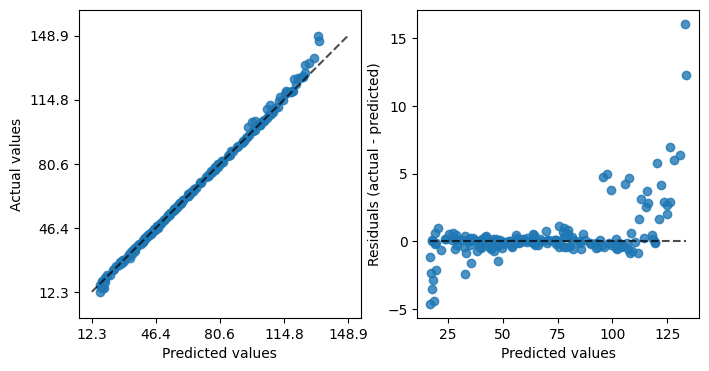

In [10]:
# @title
reg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10))

reg.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
PredictionErrorDisplay.from_estimator(reg, X, y, ax=axes[0], kind="actual_vs_predicted")
PredictionErrorDisplay.from_estimator(reg, X, y, ax=axes[1], kind="residual_vs_predicted")
plt.show()

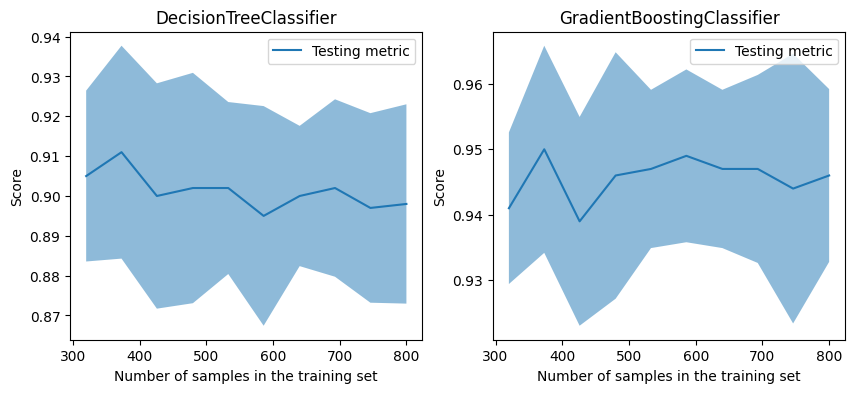

In [11]:
# @title
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import LearningCurveDisplay

X, y = make_classification(n_samples=1000, n_classes=2, n_features=10,
                           n_informative=2, n_redundant=0, n_repeated=0)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, tol=1e-3)

train_sizes = np.linspace(0.4, 1.0, 10)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
LearningCurveDisplay.from_estimator(tree_clf, X, y,
                                    train_sizes=train_sizes,
                                    ax=axes[0],
                                    scoring='accuracy')
axes[0].set_title('DecisionTreeClassifier')
LearningCurveDisplay.from_estimator(gb_clf, X, y,
                                    train_sizes=train_sizes,
                                    ax=axes[1],
                                    scoring='accuracy')
axes[1].set_title('GradientBoostingClassifier')
plt.show()

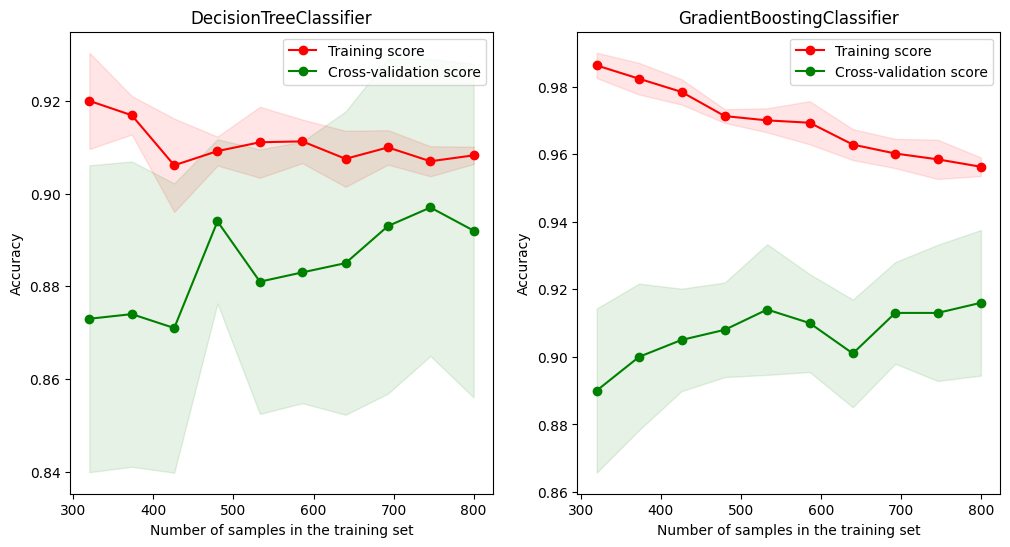

In [15]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=10,
                           n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Initialize classifiers
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, tol=1e-3)

# Train sizes
train_sizes = np.linspace(0.4, 1.0, 10)

# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Decision Tree Classifier
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(tree_clf, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_tree_mean = np.mean(train_scores_tree, axis=1)
test_scores_tree_mean = np.mean(test_scores_tree, axis=1)
train_scores_tree_std = np.std(train_scores_tree, axis=1)
test_scores_tree_std = np.std(test_scores_tree, axis=1)

axes[0].fill_between(train_sizes_tree, train_scores_tree_mean - train_scores_tree_std, train_scores_tree_mean + train_scores_tree_std, alpha=0.1, color="r")
axes[0].fill_between(train_sizes_tree, test_scores_tree_mean - test_scores_tree_std, test_scores_tree_mean + test_scores_tree_std, alpha=0.1, color="g")
axes[0].plot(train_sizes_tree, train_scores_tree_mean, 'o-', color="r", label="Training score")
axes[0].plot(train_sizes_tree, test_scores_tree_mean, 'o-', color="g", label="Cross-validation score")
axes[0].set_title('DecisionTreeClassifier')
axes[0].set_xlabel('Number of samples in the training set')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc="best")

# Gradient Boosting Classifier
train_sizes_gb, train_scores_gb, test_scores_gb = learning_curve(gb_clf, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_gb_mean = np.mean(train_scores_gb, axis=1)
test_scores_gb_mean = np.mean(test_scores_gb, axis=1)
train_scores_gb_std = np.std(train_scores_gb, axis=1)
test_scores_gb_std = np.std(test_scores_gb, axis=1)

axes[1].fill_between(train_sizes_gb, train_scores_gb_mean - train_scores_gb_std, train_scores_gb_mean + train_scores_gb_std, alpha=0.1, color="r")
axes[1].fill_between(train_sizes_gb, test_scores_gb_mean - test_scores_gb_std, test_scores_gb_mean + test_scores_gb_std, alpha=0.1, color="g")
axes[1].plot(train_sizes_gb, train_scores_gb_mean, 'o-', color="r", label="Training score")
axes[1].plot(train_sizes_gb, test_scores_gb_mean, 'o-', color="g", label="Cross-validation score")
axes[1].set_title('GradientBoostingClassifier')
axes[1].set_xlabel('Number of samples in the training set')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc="best")

plt.show()


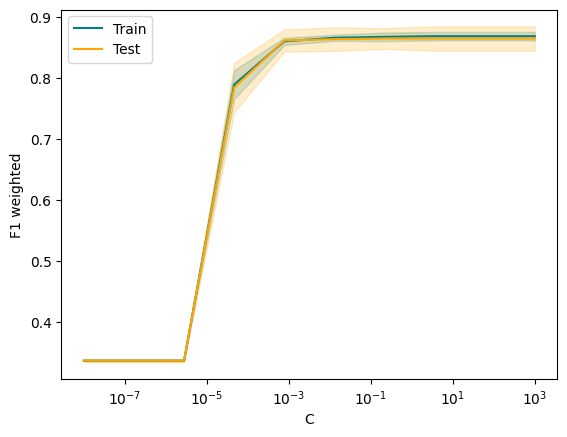

In [17]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression

# Define the parameter range and the classifier
param_name = "C"
param_range = np.logspace(-8, 3, 10)
lr_clf = LogisticRegression()

# Compute the validation curve
train_scores, test_scores = validation_curve(
    lr_clf, X, y, param_name=param_name, param_range=param_range,
    scoring='f1_weighted', cv=5, n_jobs=-1
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure()
plt.semilogx(param_range, train_scores_mean, label="Train", color="teal")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="teal", alpha=0.2)
plt.semilogx(param_range, test_scores_mean, label="Test", color="orange")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="orange", alpha=0.2)
plt.xlabel(param_name)
plt.ylabel("F1 weighted")
plt.legend(loc="best")
plt.show()
